In [1]:
import matplotlib
import scipy 
import sys
import argparse
import numpy
import dadi
from dadi import Numerics, PhiManip, Integration, Spectrum, Misc
import dadi.Godambe

In [2]:
fs= dadi.Spectrum.from_file("ENP-44.sfs")
ns = fs.sample_sizes # get sample size from SFS (in haploids)
pts_l = [ns[0]+5,ns[0]+15,ns[0]+25] # this should be slightly larger (+5) than sample size and increase by 10
maxiter= 100

In [5]:
def bottleneck(params, ns, pts): 
    nuB,nuF,TB,TF = params
    xx = Numerics.default_grid(pts) # sets up grid
    phi = PhiManip.phi_1D(xx) # sets up initial phi for population 
    phi = Integration.one_pop(phi, xx, TB, nuB)  # bottleneck
    phi = Integration.one_pop(phi, xx, TF, nuF) # recovery 
    fs = Spectrum.from_phi(phi, ns, (xx,)) 
    return fs
param_names=("nuB","nuF","TB","TF")

func=bottleneck 
func_ex = dadi.Numerics.make_extrap_log_func(func)

  ## Run best model as p0

In [4]:
popt = [1.4511,0.01848,0.134,6.07e-5] 

4       , -187.427    , array([ 1.4511     ,  0.01848    ,  0.134134   ,  6.07e-05   ])
8       , -96031.1    , array([ 0.595802   ,  0.0241561  ,  0.109243   ,  4.32916e-05])
12      , -96039.1    , array([ 0.595802   ,  0.0241561  ,  0.109243   ,  4.33349e-05])
16      , -187.423    , array([ 1.45085    ,  0.0184995  ,  0.133995   ,  6.0696e-05 ])
20      , -187.42     , array([ 1.45109    ,  0.0184801  ,  0.134      ,  6.06998e-05])
24      , -187.433    , array([ 1.45109    ,  0.0184801  ,  0.134      ,  6.07605e-05])
28      , -187.41     , array([ 1.4511     ,  0.0184985  ,  0.134      ,  6.07e-05   ])
32      , -187.419    , array([ 1.4511     ,  0.01848    ,  0.134      ,  6.07e-05   ])
36      , -187.432    , array([ 1.4511     ,  0.01848    ,  0.134      ,  6.07607e-05])
40      , -187.41     , array([ 1.4511     ,  0.0184985  ,  0.134      ,  6.07e-05   ])
44      , -187.419    , array([ 1.4511     ,  0.01848    ,  0.134      ,  6.07e-05   ])
48      , -187.432    , array([ 

392     , -187.419    , array([ 1.4511     ,  0.01848    ,  0.134      ,  6.07e-05   ])
396     , -187.432    , array([ 1.4511     ,  0.01848    ,  0.134      ,  6.07607e-05])
400     , -187.41     , array([ 1.4511     ,  0.0184985  ,  0.134      ,  6.07e-05   ])
404     , -187.419    , array([ 1.4511     ,  0.01848    ,  0.134      ,  6.07e-05   ])
408     , -187.432    , array([ 1.4511     ,  0.01848    ,  0.134      ,  6.07607e-05])
412     , -187.41     , array([ 1.4511     ,  0.0184985  ,  0.134      ,  6.07e-05   ])
416     , -187.419    , array([ 1.4511     ,  0.01848    ,  0.134      ,  6.07e-05   ])
420     , -187.432    , array([ 1.4511     ,  0.01848    ,  0.134      ,  6.07607e-05])
424     , -187.41     , array([ 1.4511     ,  0.0184985  ,  0.134      ,  6.07e-05   ])
428     , -187.419    , array([ 1.4511     ,  0.01848    ,  0.134      ,  6.07e-05   ])
432     , -187.432    , array([ 1.4511     ,  0.01848    ,  0.134      ,  6.07607e-05])
436     , -1574.64    , array([ 

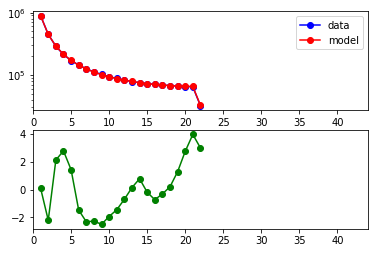

In [5]:
popt_log = dadi.Inference.optimize_log(popt, fs, func_ex, pts_l, 
                                   verbose=len(popt), maxiter=maxiter)
print('Best-fit parameters: {0}'.format(popt_log))

model = func_ex(popt_log, ns, pts_l)

ll_model = dadi.Inference.ll_multinom(model, fs)
print('Maximum log composite likelihood: {0}'.format(ll_model))

theta = dadi.Inference.optimal_sfs_scaling(model, fs)
print('Optimal value of theta: {0}'.format(theta))

# Plot a comparison of the resulting fs with the data.
dadi.Plotting.plot_1d_comp_multinom(model, fs)

1596    , -214.839    , array([ 1.4511     ,  0.01848    ,  0.121188   ,  6.07e-05   ])
1600    , -332.708    , array([ 1.46638    ,  0.0222818  ,  0.126635   ,  5.37624e-05])
1604    , -246.93     , array([ 1.42893    ,  0.0173324  ,  0.125239   ,  5.61592e-05])
1608    , -207.477    , array([ 1.45631    ,  0.0176997  ,  0.130919   ,  6.63724e-05])
1612    , -192.551    , array([ 1.45717    ,  0.0173736  ,  0.137945   ,  5.82229e-05])
1616    , -189.007    , array([ 1.45649    ,  0.0176452  ,  0.135114   ,  5.84962e-05])
1620    , -187.831    , array([ 1.45731    ,  0.0178952  ,  0.132714   ,  5.94243e-05])
1624    , -189.072    , array([ 1.44983    ,  0.0179745  ,  0.132918   ,  6.01128e-05])
1628    , -187.438    , array([ 1.45452    ,  0.0176768  ,  0.13286    ,  5.9098e-05 ])
1632    , -187.42     , array([ 1.45377    ,  0.0179373  ,  0.133177   ,  5.91012e-05])
1636    , -187.393    , array([ 1.45401    ,  0.01788    ,  0.133031   ,  5.94208e-05])
1640    , -187.383    , array([ 

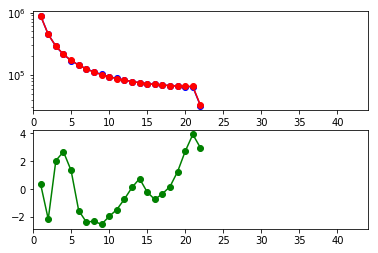

In [37]:
popt = [1.4511,0.01848,0.134,6.07e-5] 
popt_log_fmin = dadi.Inference.optimize_log_fmin(popt, fs, func_ex, pts_l, 
                                   verbose=len(popt), maxiter=maxiter)
print('Best-fit parameters: {0}'.format(popt_log_fmin))

model = func_ex(popt_log_fmin, ns, pts_l)

ll_model = dadi.Inference.ll_multinom(model, fs)
print('Maximum log composite likelihood: {0}'.format(ll_model))

theta = dadi.Inference.optimal_sfs_scaling(model, fs)
print('Optimal value of theta: {0}'.format(theta))

# Plot a comparison of the resulting fs with the data.
dadi.Plotting.plot_1d_comp_multinom(model, fs)

## Uncertainty analysis

In [4]:
# nuB, nuF, TB, TF
popt = [1.450701165,0.018399839,0.134097375,6.00E-05] 
uncerts_fim = dadi.Godambe.FIM_uncert(func_ex, pts_l, popt, fs, multinom=True)
print('Estimated parameter standard deviations from FIM: {0}'.format(uncerts_fim))

Estimated parameter standard deviations from FIM: [3.81438485e-03 1.86242955e-05 2.32216104e-03            nan
 7.27021495e+02]


In [5]:
dadi.Godambe.FIM_uncert(func_ex, pts_l, popt, fs, multinom=True, log=True)

array([0.00092623, 0.39878755, 0.02137593, 0.43029193, 0.00128751])

In [3]:
#Bootstraping
datafile = './bootstrap/SNPs_for_SFS_ENP.vcf.gz'
dd = dadi.Misc.make_data_dict_vcf(datafile, './bootstrap/ENP_samples.txt')


In [4]:
# Generate 100 bootstrap datasets, by dividing the genome into 2 Mb chunks and
# resampling from those chunks.
Nboot, chunk_size = 100, 2e6
chunks = dadi.Misc.fragment_data_dict(dd, chunk_size)

In [5]:
pop_ids, ns = ['ENP'], [44]
boots = dadi.Misc.bootstraps_from_dd_chunks(chunks, Nboot, pop_ids, ns, polarized=False)

In [9]:
boots

[Spectrum([-- 858762.5058849135 432721.5450377115 277230.74541476904
  203222.74970283135 163541.40415617553 138612.62428258432
  121131.16663870776 107980.3803279301 98083.80722874167 90028.2769467319
  83937.32089945719 78812.47109434611 74467.2436374194 71177.05203892894
  68972.89804192289 67054.04706595792 65205.9260438828 63750.13484799378
  62507.944761481085 61408.21796783471 60756.4176995956 30282.249843814603
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=['ENP']),
 Spectrum([-- 914040.2894748626 460356.8381693644 297199.78093108826
  219320.70664628842 176763.72107128552 150350.3025991254
  130996.10121108474 116717.62501390159 105790.64961069362
  97879.27360950278 91523.94585086739 85909.18425500715 81006.92815676572
  76999.96609898383 74295.24560734695 72336.71933737893 70732.48088888389
  69345.87938403357 68203.31744733786 67516.368761553 67158.14207504844
  33528.42075680975 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

In [11]:
# nuB, nuF, TB, TF
popt = [1.450701165,0.018399839,0.134097375,6.00E-05] 
uncerts = dadi.Godambe.GIM_uncert(func_ex, pts_l, boots, popt, fs, 
                                  multinom=True)
print('Estimated parameter standard deviations from GIM: {0}'.format(uncerts))

Estimated parameter standard deviations from GIM: [2.46958889e-01 2.52587958e-02 5.37026797e-02 1.57259586e-06
 1.47430996e+04]


In [12]:
print('Factors by which FIM underestimates parameter uncertainties: {0}'.format(uncerts/uncerts_fim))

Factors by which FIM underestimates parameter uncertainties: [  64.7440934  1356.22825533   23.12616512           nan   20.27876714]


<div style="background-color:darkolivegreen;color:white;padding:20px;">
</div>

## 3 Epoch model (TF fixed to 3 generations)

In [11]:
def bottleneck(params, ns, pts): 
    nuB,nuF,TB = params
    xx = Numerics.default_grid(pts) # sets up grid
    phi = PhiManip.phi_1D(xx) # sets up initial phi for population 
    phi = Integration.one_pop(phi, xx, TB, nuB)  # bottleneck
    phi = Integration.one_pop(phi, xx, 9.2250e-05, nuF) # recovery 
    fs = Spectrum.from_phi(phi, ns, (xx,)) 
    return fs
param_names=("nuB","nuF","TB","TF")

func=bottleneck 
func_ex = dadi.Numerics.make_extrap_log_func(func)

In [12]:
# nuB, nuF, TB
popt = [1.451501866,0.027883941,0.13370468] 
uncerts_fim = dadi.Godambe.FIM_uncert(func_ex, pts_l, popt, fs, multinom=True)
print('Estimated parameter standard deviations from FIM: {0}'.format(uncerts_fim))

Estimated parameter standard deviations from FIM: [1.33017206e-02 1.96057802e-03 3.63413972e-03 7.45010276e+02]


In [13]:
uncerts = dadi.Godambe.GIM_uncert(func_ex, pts_l, boots, popt, fs, 
                                  multinom=True)
print('Estimated parameter standard deviations from GIM: {0}'.format(uncerts))

Estimated parameter standard deviations from GIM: [3.97137496e-02 5.62992627e-03 1.63424593e-02 1.39852401e+04]


In [3]:
#Parameter range nuB 95%
lower = (1.451501866 - (2*3.97137496e-02))*16481.13666
upper = (1.451501866 + (2*3.97137496e-02))*16481.13666
print(lower, upper)

22613.34514691377 25231.456084668247


In [4]:
#Parameter range nuF 95%
lower = (0.027883941 - (2*5.62992627e-03))*16481.13666
upper = (0.027883941 + (2*5.62992627e-03))*16481.13666
print(lower, upper)

273.9838737571889 645.1342107235652


In [6]:
#Parameter range TB 95%
lower = (0.13370468 - (2*1.63424593e-02))*2*16481.13666
upper = (0.13370468 + (2*1.63424593e-02))*2*16481.13666
print(lower, upper)

3329.8409859879857 5484.579426658289


## 3 Epoch model (TF fixed to 2 generations)

In [14]:
def bottleneck(params, ns, pts): 
    nuB,nuF,TB = params
    xx = Numerics.default_grid(pts) # sets up grid
    phi = PhiManip.phi_1D(xx) # sets up initial phi for population 
    phi = Integration.one_pop(phi, xx, TB, nuB)  # bottleneck
    phi = Integration.one_pop(phi, xx, 6.07e-5, nuF) # recovery 
    fs = Spectrum.from_phi(phi, ns, (xx,)) 
    return fs
param_names=("nuB","nuF","TB","TF")

func=bottleneck 
func_ex = dadi.Numerics.make_extrap_log_func(func)

In [15]:
# nuB, nuF, TB
popt = [1.451388021,0.018582979,0.133540107] 
uncerts_fim = dadi.Godambe.FIM_uncert(func_ex, pts_l, popt, fs, multinom=True)
print('Estimated parameter standard deviations from FIM: {0}'.format(uncerts_fim))

Estimated parameter standard deviations from FIM: [1.37772798e-02 1.37765317e-03 3.68492442e-03 7.41837362e+02]


In [16]:
uncerts = dadi.Godambe.GIM_uncert(func_ex, pts_l, boots, popt, fs, 
                                  multinom=True)
print('Estimated parameter standard deviations from GIM: {0}'.format(uncerts))

Estimated parameter standard deviations from GIM: [4.21584625e-02 4.10965952e-03 1.63104356e-02 1.39593588e+04]


In [7]:
#Parameter range nuB 95%
lower = (1.451388021 - (2*4.21584625e-02))*16481.4193
upper = (1.451388021 + (2*4.21584625e-02))*16481.4193
print(lower, upper)

22531.271946086556 25310.59713610986


In [8]:
#Parameter range nuF 95%
lower = (0.018582979 - (2*4.10965952e-03))*16481.4193
upper = (0.018582979 + (2*4.10965952e-03))*16481.4193
print(lower, upper)

170.80782528338122 441.7399122008082


In [9]:
#Parameter range TB 95%
lower = (0.133540107 - (2*1.63104356e-02 ))*2*16481.4193
upper = (0.133540107 + (2*1.63104356e-02 ))*2*16481.4193
print(lower, upper)

3326.584481310742 5477.137506024718


## 3 Epoch (fixed 10 gen)

In [6]:
def bottleneck(params, ns, pts): 
    nuB,nuF,TB = params
    xx = Numerics.default_grid(pts) # sets up grid
    phi = PhiManip.phi_1D(xx) # sets up initial phi for population 
    phi = Integration.one_pop(phi, xx, TB, nuB)  # bottleneck
    phi = Integration.one_pop(phi, xx, 3.03e-4, nuF) # recovery 
    fs = Spectrum.from_phi(phi, ns, (xx,)) 
    return fs
param_names=("nuB","nuF","TB","TF")

func=bottleneck 
func_ex = dadi.Numerics.make_extrap_log_func(func)
# nuB, nuF, TB
popt = [1.455660674,0.085491738,0.132615353] 
uncerts_fim = dadi.Godambe.FIM_uncert(func_ex, pts_l, popt, fs, multinom=True)
print('Estimated parameter standard deviations from FIM: {0}'.format(uncerts_fim))
uncerts = dadi.Godambe.GIM_uncert(func_ex, pts_l, boots, popt, fs, 
                                  multinom=True)
print('Estimated parameter standard deviations from GIM: {0}'.format(uncerts))

Estimated parameter standard deviations from FIM: [2.61242703e-02 1.04773238e-02 7.26050523e-03 9.94627336e+02]
Estimated parameter standard deviations from GIM: [2.08847952e-01 8.32436341e-02 6.60744485e-02 1.73913382e+04]


## 3Epoch (fixed 100 gen )

In [7]:
def bottleneck(params, ns, pts): 
    nuB,nuF,TB = params
    xx = Numerics.default_grid(pts) # sets up grid
    phi = PhiManip.phi_1D(xx) # sets up initial phi for population 
    phi = Integration.one_pop(phi, xx, TB, nuB)  # bottleneck
    phi = Integration.one_pop(phi, xx, 3.03e-3, nuF) # recovery 
    fs = Spectrum.from_phi(phi, ns, (xx,)) 
    return fs
param_names=("nuB","nuF","TB","TF")

func=bottleneck 
func_ex = dadi.Numerics.make_extrap_log_func(func)
# nuB, nuF, TB
popt = [1.47157109,0.524052986,0.127161506] 
uncerts_fim = dadi.Godambe.FIM_uncert(func_ex, pts_l, popt, fs, multinom=True)
print('Estimated parameter standard deviations from FIM: {0}'.format(uncerts_fim))
uncerts = dadi.Godambe.GIM_uncert(func_ex, pts_l, boots, popt, fs, 
                                  multinom=True)
print('Estimated parameter standard deviations from GIM: {0}'.format(uncerts))

Estimated parameter standard deviations from FIM: [1.94136387e-02 2.57393085e-02 5.02304356e-03 8.41696810e+02]
Estimated parameter standard deviations from GIM: [1.03939378e-01 1.35199121e-01 3.45155844e-02 1.59531181e+04]


## 2 Epoch

In [9]:
func = Demographics1D.two_epoch
func_ex = dadi.Numerics.make_extrap_log_func(func)

In [10]:
popt = [1.297545096,0.205744551] 
uncerts = dadi.Godambe.GIM_uncert(func_ex, pts_l, boots, popt, fs, 
                                  multinom=True)
print('Estimated parameter standard deviations from GIM: {0}'.format(uncerts))

Estimated parameter standard deviations from GIM: [1.50815105e-02 1.82916228e-02 1.49160033e+04]


## 4 Epoch

In [11]:
def bottleneck(params, ns, pts):
    nuB,nuF,nuC,TB,TF,TC = params
    xx = Numerics.default_grid(pts) # sets up grid
    phi = PhiManip.phi_1D(xx) # sets up initial phi for population
    phi = Integration.one_pop(phi, xx, TB, nuB)  # bottleneck
    phi = Integration.one_pop(phi, xx, TF, nuF) # recovery
    phi = Integration.one_pop(phi, xx, TC, nuC) # current
    fs = Spectrum.from_phi(phi, ns, (xx,))
    return fs
func=bottleneck
func_ex = dadi.Numerics.make_extrap_log_func(func)

In [19]:
#nuB,nuF,nuC,TB,TF,TC
popt = [0.01189154,0.0012389,0.00929570,0.1020836,0.14685704,0.01684687] 
#popt = [0.014880194,0.009645169,0.06687843,0.096491051,0.157291653,0.120639541]

In [20]:
uncerts_fim = dadi.Godambe.FIM_uncert(func_ex, pts_l, popt, fs, multinom=True)
print('Estimated parameter standard deviations from FIM: {0}'.format(uncerts_fim))

LinAlgError: Singular matrix

In [18]:
uncerts = dadi.Godambe.GIM_uncert(func_ex, pts_l, boots, popt, fs, 
                                  multinom=True)
print('Estimated parameter standard deviations from GIM: {0}'.format(uncerts))

Estimated parameter standard deviations from GIM: [1.16200450e-01 2.36472092e-02 1.43868015e-02 5.54687681e-01
 7.74484902e-03 5.81097819e-02 2.77004414e+06]
